<a href="https://colab.research.google.com/github/AllanRocha28/Data-Science/blob/main/Airbnb_B%C3%A9rgamo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Bérgamo, Lombardia - Itália*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Bérgamo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## **Sobre Bérgamo**

Bérgamo é uma cidade italiana, província da região da Lombardia.

A cidade está dividida em duas distintas áreas: A Città Alta (cidade Alta), um centro histórico cercado por uma muralha, e a Città Bassa (Cidade Baixa) , uma região mais moderna, onde estão localizados os comércios, indústrias.

Apesar de não ser tão conhecida, quanto outras cidades italianas, Bérgamo apresenta diferentes pontos turísticos e belezas que estão atraindo e levando turistas a conhecer os encantos desse lindo lugar.

No estudo realizado, os dados coletados e apresentados, poderão auxiliar a você a conhecer um pouco mais sobre o funcionamento da plataforma do Airbnb na região, destacando as principais informações que você pode necessitar para se hospedar e explorar este lindo lugar.

<center><img alt="Bérgamo" width="75%" src="https://upload.wikimedia.org/wikipedia/commons/0/0c/Sunrise_at_Bergamo_old_town%2C_Lombardy%2C_Italy.jpg">
</center>

## Obtenção dos Dados


Os dados deste estudo foram baixados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para a análise o arquivo baixado foi:

* `	listings.csv` - *Summary information and metrics for listings in Bergamo (good for visualisations).*

O site sofre constantes atualizações e por isso o arquivo utilizado neste estudo pode ter alterado em algum outro momento. Pensando nisso, o arquivo utilizado nessa análise fica disponível para ser [baixado](https://www.dropbox.com/s/hhhclxvefqu5mla/listings.csv?dl=1).


Faremos a importação dos arquivos necessários à análise.

In [1]:
# importar os pacotes necessarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://www.dropbox.com/s/hhhclxvefqu5mla/listings.csv?dl=1")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - identificador do Airbnb para cada anúncio
* `name` - nome da propriedade
* `host_id` - identificação do Airbnb para o anfitrião
* `host_name` - nome do anfitrião
* `neighbourhood_group` - não há dados para esta variável
* `neighbourhood` - nome dos bairros
* `latitude` - posição geográfica da propriedade, em termos da sua latitude
* `longitude` - posição geográfica da propriedade, em termos da sua longitude
* `room_type` - tipo de imóvel para alugar
* `price` - preço da diária
* `minimum_nights` - número mínimo de noites para reservar
* `number_of_reviews` - número de *reviews* que a propriedade possui
* `last_review` - data da última revisão
* `reviews_per_month` - quantidade de *reviews* por mês
* `calculated_host_listings_count` - quantidade de propriedades de um mesmo anfitrão
* `availability_365` - número de dias disponíveis em 365 dias
* `number_of_reviews_ltm` - número de reviews nos últimos 12 meses para o imóvel
* `license` - número da licença, permisão ou registro do imóvel

Antes de iniciar qualquer análise, vamos verificar o *dataset*, analisando as 5 primeiras entradas e as 5 últimas saídas.

In [4]:
# mostrar as 5 primeiras entradas
display(df.head())

# 5 últimas saídas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15526,Residenza PALAZZO lake view,60754,"Andrea, Maurizio, And Tina",NaN,Solto Collina,45.78464,10.02629,Entire home/apt,119,3,37,2021-08-26,0.29,5,63,2,NaN
1,15542,Suite PANORAMA facing the lake,60754,"Andrea, Maurizio, And Tina",NaN,Solto Collina,45.78354,10.02471,Entire home/apt,87,3,42,2021-09-21,0.36,5,72,2,NaN
2,31412,Cute and Cosy Terrace,134937,Elena,NaN,Bergamo,45.69052,9.67099,Entire home/apt,64,1,93,2021-10-05,0.78,10,1,14,NaN
3,116423,Casetta a 12km da lago d'iseo,588254,Angela,NaN,Bossico,45.82840,10.04476,Entire home/apt,62,7,8,2019-11-03,0.18,3,292,0,CIR 016033-CNI-00002T00146
4,179345,Bossico Vicino a Montisola e lago D'iseo,588254,Angela,NaN,Bossico,45.82723,10.04484,Entire home/apt,60,7,11,2021-09-30,0.25,3,292,1,CIR 016033-CNI-00002T00146


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2238,53963904,Castello Lovere - Mosto,437130287,Lara,NaN,Lovere,45.820680,10.078240,Entire home/apt,160,3,0,NaN,NaN,5,43,0,NaN
2239,53976065,Appartamento bianco Natale,106588650,Lorenzo,NaN,Roncola,45.771070,9.557320,Entire home/apt,100,5,0,NaN,NaN,6,89,0,NaN
2240,53992857,Appartamento KEPLERO G.,25916762,Mario,NaN,Bergamo,45.672279,9.664339,Entire home/apt,90,1,0,NaN,NaN,10,274,0,NaN
2241,54002639,Santa Osola Home.\n lovely 3 bedrooms house,330339789,Derrick Kwaku Peterson,NaN,Bergamo,45.694570,9.665920,Private room,200,1,0,NaN,NaN,2,363,0,NaN
2242,54026928,Casa da cinzia,437802823,Cinzia,NaN,Zanica,45.637360,9.686720,Entire home/apt,72,1,0,NaN,NaN,1,365,0,NaN


Para o conjunto de dados escolhidos, `listing.csv`, que é um *Summary* há 18 variáveis no dataset e 2243 valores de entradas. 

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 2243
Variáveis: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Saber a quantidade de valores nulos em um dataset é importante para saber quais variáveis não iremos considerar na análise.

* `neighbourhood_group` - não possui valor nenhum, 100% dos valores estão faltando.
* `license` - tem 81% de valores nulos.
* `reviews_per_month` e `last_review` as duas variáveis apresentam a mesma quantidade de valores faltantes, quase 21%.

A variável `host_name` é a ultima que apresenta valores faltantes: 0,09%; como o valor é baixo ela pode ser considerada na análise.

In [7]:
# colocar em ordem decrescente as variáveis com valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.812751
reviews_per_month                 0.205974
last_review                       0.205974
host_name                         0.000892
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Como as variáveis `neighbourhood_group`, `license`, `reviews_per_month` e `last_review` tem pouco poder preditivo e não serão utilizadas na análise, iremos excluí-las do data set.

In [8]:
df.drop(['neighbourhood_group', 'license', 'reviews_per_month', 'last_review'], axis=1, inplace=True)

Para observar melhor as variáveis numéricas do dataset, será feito um histograma destas.

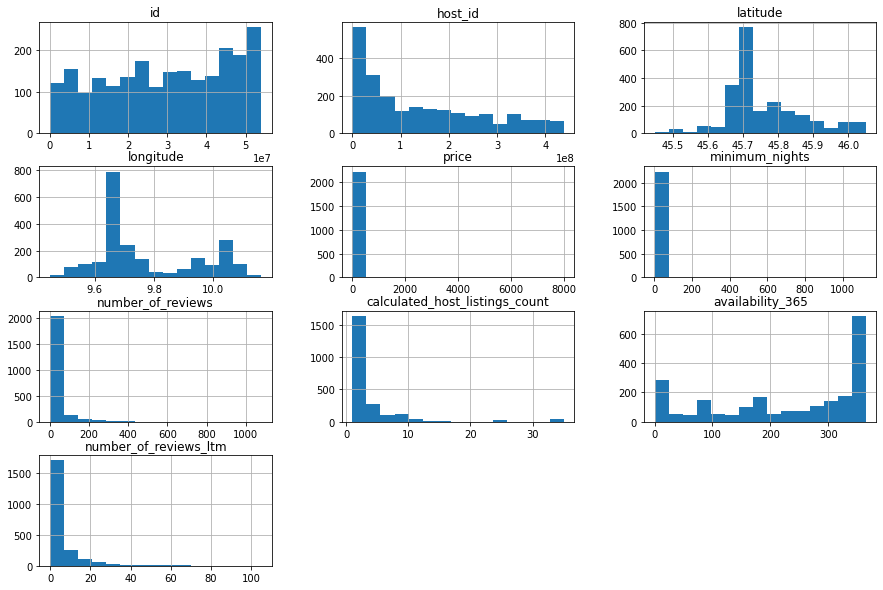

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

A partir dos histogramas plotados pode ser observado valores de *outliers* para as variáveis `price` e `minimum_nights`. A presença dos *outliers* podem prejudicar a análise do estudo, pois estes acabam enviesando o resultado, sendo necessário realizar um tratamento do dataset com a retirada dos valores de *outliers*.

Será realizado um resumo estatístico e boxplots das variáveis `price` e `minimum_nights` para observar a influência dos *outliers*.

In [10]:
# Apresentação do resumo estatístico para as variáveis em análise 
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,2243.000000,2243.000000
mean,125.484619,4.594739
std,498.085691,30.844063
min,9.000000,1.000000
25%,50.000000,1.000000
50%,70.000000,2.000000
75%,104.500000,3.000000
max,7999.000000,1124.000000


Observa-se que os valores máximos para `price` e `minimum_nights` são € 7.999,00 e 1124 dias, respectivamente, o que mostra a presença dos *outliers*.

Pode ser observado que 75% dos valores para a variável `price` estão abaixo de € 104,5 e que 75% das pessoas não alugam mais que 3 noites, além disso a média, parâmetro sensível aos valores, apresenta valores diferentes da mediana, parâmetro mais robusto, o que demonstra a influência dos *outliers*.

#### Boxplots

O Boxplots é uma excelente ferramenta que permite observar de forma rápida uma série de informações, como a distribuição dos *outliers*.

Abaixo apresento os boxplots para as variáveis `minimum_nights` e `price` sem qualquer tratamento. 

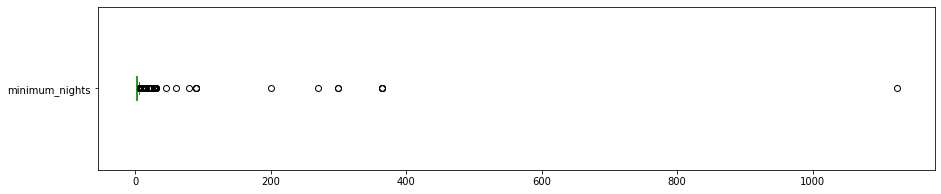

minimum_nights: > 30 dias:
18 entradas
0.8025%


In [11]:
# Boxplot minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Quantidade de valores acima de 30 dias e sua porcentagem nos dados
print("minimum_nights: > 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]*100)))

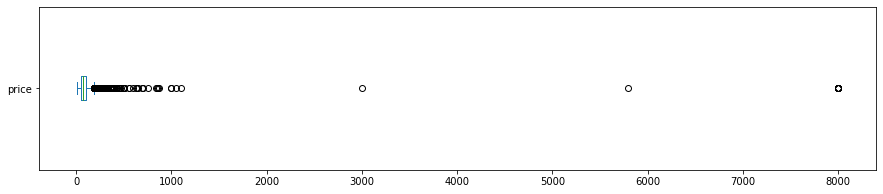

price: acima de 650 euros
21 entradas
0.9362%


In [12]:
# Boxplot price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Valores acima de 650 euros 
print("price: acima de 650 euros")
print("{} entradas".format(len(df[df.price > 650])))
print("{:.4f}%".format((len(df[df.price > 650]) / df.shape[0]*100)))

Vemos que para a variável `minimum_nights` há 18 valores para reservas acima de 30 dias, o que representa 0,80% dos valores do dataset, e que para a variável `price` há 21 valores, 0,94%, acima de 650 euros.

Vamos realizar o tratamento do dataset a partir do método do IQR - *Interquatile Range* para fazer a retirada dos *outliers* sem prejudicar o dataset.

#### Limpando o Dataset

In [13]:
# Tratando da variável price

# 1º - Definindo Q1 e Q3
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)

# 2º - Calculando IQR
IQR_price = q3_price-q1_price

# 3º - Definido os limites superior e inferior do Boxplots
sup_price = q3_price + 1.5*IQR_price
inf_price = q1_price - 1.5*IQR_price
#print('Valores dos limites superior e inferior do boxplot: {} e {}'.format(sup_price, inf_price))

# 4º - Removendo os outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)

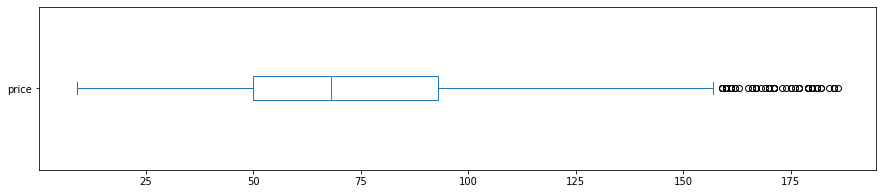

In [14]:
# Boxplot price
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()


In [15]:
# Tratando da variável minimum_nights

# 1º - Definindo Q1 e Q3
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)

#print("q1: {} dias".format(q1_minimum_nights))
#print("q3: {} dias".format(q3_minimum_nights))

# 2º - Calculando IQR
IQR_minimum_nights = q3_minimum_nights-q1_minimum_nights

# 3º - Definido os limites superior e inferior do Boxplots
sup_minimum_nights = q3_minimum_nights + 1.5*IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5*IQR_minimum_nights

#print("sup_minimum_nights: {} dias".format(sup_minimum_nights))
#print("inf_minimum_nights: {} dias".format(inf_minimum_nights))

# 4º - Removendo os outliers
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights == 0].index, axis=0, inplace=True)

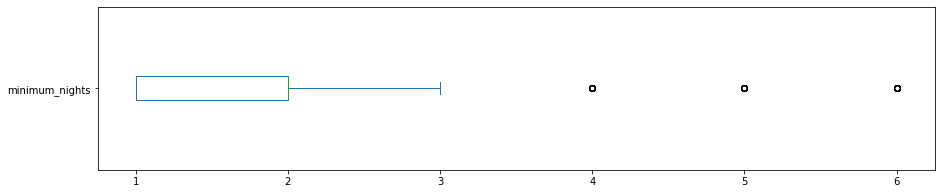

In [16]:
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [17]:
df_clean[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,1906.000000,1906.000000
mean,76.730325,1.896642
std,35.825762,1.130033
min,9.000000,1.000000
25%,50.000000,1.000000
50%,69.000000,2.000000
75%,94.000000,2.000000
max,186.000000,6.000000


Com a retirada dos *outliers* percebe-se como os gráficos de Boxplots mudaram totalmente o seu formato.

Na tabela é possível perceber que a média e a mediana estão mais próximas, o que demostra a redução da influência dos *outliers*. Também é possível perceber a redução do desvio padrão (*std*) para as duas variáveis.

Por fim, nota-se a diminuição dos valores máximos dessas variáveis.

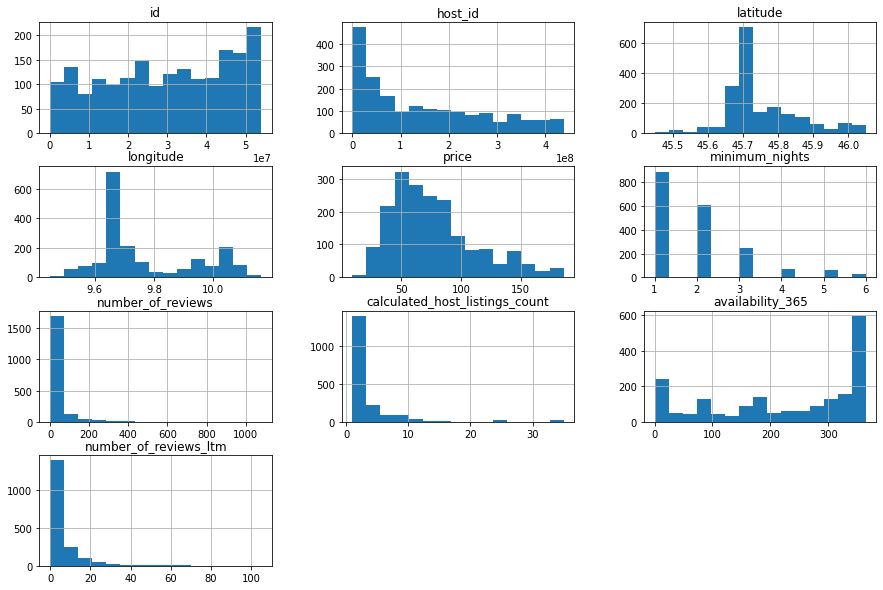

In [18]:
# Plotando o histograma novamente após a limpeza dos outliers
df_clean.hist(bins=15, figsize=(15,10));

Agora é possível observar melhor a distibuição dos valores para as variáveis `price` e `minimum_nights`.

Para a `price` vemos um aumento do valor dos imóveis até € 50, seguida de uma diminuição, o que mostra que as pessoas estão mais dispostas a pagar um valor de hospedagem em torno desse valor; enquanto que para a variável `minimum_nights` a hospedagem mínima de 1 dia é a que possui a maior quantidade de imóveis disponíveis, reduzindo rapidamente a medida em que o número de dias para hospedagem aumenta.

In [19]:
# ver a média da coluna `price`
print("média_price:")
df_clean['price'].mean()

média_price:


76.73032528856244

Com a limpeza do dataset observar-se o comportamento das variáveis ainda mais próximas da realidade.

Isso pode ser explicado melhor a partir do valor médio da hospedagem. Antes o valor médio era de € 125,48, com a limpeza do dataset o valor passou a ser de € 76,73, diferença de quase 40%. Alinhado ao que é observado no histogrma, um número reduzido de pessoas pagam acima de € 100,00.

A correlação expressa se há ou não uma relação entre duas ou mais variáveis. A partir do gráfico de *heatmap* é possível ver essas relações de forma rápida.

Será feito uma matriz de correlação e em seguida será feito um gráfico de *Heatmap*.

In [20]:
# criar uma matriz de correlação
correlacao = df_clean[['price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display (correlacao)

,price,minimum_nights,calculated_host_listings_count,availability_365
price,1.000000,-0.009636,0.278272,0.186057
minimum_nights,-0.009636,1.000000,-0.039068,-0.126106
calculated_host_listings_count,0.278272,-0.039068,1.000000,0.164011
availability_365,0.186057,-0.126106,0.164011,1.000000


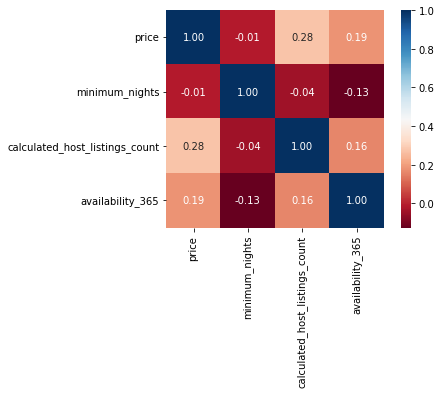

In [21]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

O gráfico *heatmap* não apresentou nenhuma forte correlação entre as variáveis analisadas.

O Airbnb dá várias opções de reservas, a variável `room_type` apresenta os tipos de imóveis.

Abaixo vemos a quantidade dos tipos de imóveis e seu valor em percentagem.

In [22]:
# mostrar a quantidade disponiveis para cada tipo de imóvel
df_clean.room_type.value_counts()

Entire home/apt    1425
Private room        444
Hotel room           29
Shared room           8
Name: room_type, dtype: int64

In [23]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.747639
Private room       0.232949
Hotel room         0.015215
Shared room        0.004197
Name: room_type, dtype: float64

Os principais tipos de imóveis disponíveis são casas ou apartamentos inteiros, aproximadmente 75%, e o segundo são quartos privados, 23%.

Vamos observar aonde estãos os bairros de Bérgamo com os valores mais altos.

In [26]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Pianico           185.0
Bonate Sotto      156.0
Foresto Sparso    155.0
Fino del Monte    145.5
Bianzano          137.5
Valnegra          136.0
Taleggio          133.0
Selvino           132.5
Mezzoldo          128.0
Valbrembo         124.0
Name: price, dtype: float64

Acima é apresentado os 10 bairros com os maiores valores médios.

Conforme pode ser visto abaixo, alguns dos bairros com os maiores valores médios de hospedagem não apresentam um número de imóveis deforma a representa significativamente o preço médio da região.

In [54]:
df_clean[df_clean.neighbourhood == "Pianico"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1491,40796817,Feel at Home - VILLA ULIVETA,131153491,Feel At Home,Pianico,45.80841,10.03632,Entire home/apt,185,2,4,15,342,1


In [58]:
df_clean[df_clean.neighbourhood == "Selvino"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
881,24199715,Alba,138516320,Sabrina,Selvino,45.77956,9.74717,Entire home/apt,110,1,1,1,156,1
1347,36436015,La casa nel bosco,16101206,Laura,Selvino,45.77794,9.74820,Entire home/apt,120,3,8,1,147,4
1594,43124267,Contessa Pace - Luxury flat “App. Perello”,153217133,Gabriella,Selvino,45.78227,9.74765,Entire home/apt,150,2,0,2,173,0
1595,43130318,Contessa Pace - Luxury flat “App. Poieto”,153217133,Gabriella,Selvino,45.78237,9.74771,Entire home/apt,150,2,0,2,171,0


Vamos utilizar os valores de latitude e longitude dos imóveis para plotar um gráfico *scatter*.

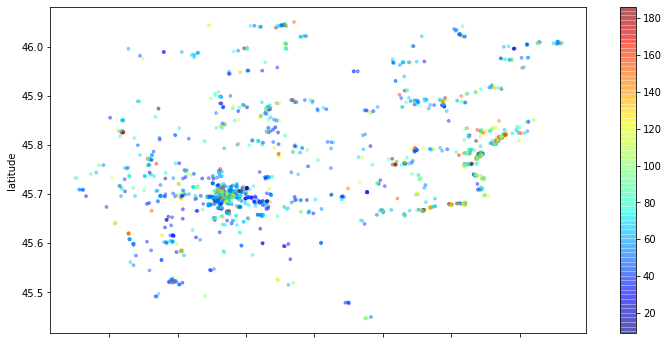

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12, 6));

Não há regiões concentradas de imóveis com valores muito elevados, contudo é possíel ver que há uma região mais concentrada que corresponde ao centro de Bérgamo.

In [ ]:
# ver a média da coluna `minimum_nights`
df_clean['minimum_nights'].mean()

1.8966421825813222

## **Conclusões**

Neste estudo foi possível conhecer um pouco mais sobre a província de Bérgamo e a presença do Airbnb na região.

As variáveis analisadas, tiveram como intuito destacar e justificar a precificação dos imóveis de acordo com a localização.

A metodologia utilizada neste trabalho poderá ser replicada para outras cidades de acordo com o destino da sua viagem.

A ferramenta do Airbnb é uma excelente aliada para a programação do seu passeio, permitindo ter uma experiência única e agradável de acordo com as suas necessidades.

Portanto fique a vontade para utilizar este estudo nos seus próximos planejamentos turísticos.

# <center> Boa viagem! </center>